Author: Sanath H Patil

Environment: Python 3.6.1 and Jupyter notebook

Libraries used: Main libraries used in the project:

   - nltk(Natural Language Toolkint) libraries and programs for natural language processing
   - sklearn for Implepenting various models
   - pandas(for creating dataframes, included in Anaconda Python 3.6)
   - numpy(for numeric calculations, included in Anaconda Python 3.6)
   - matplotlib(for plotting dataframes, included in Anaconda Python 3.6)
   - re (for regular expression, included in Anaconda Python 3.6)
   - warnings (to ignore any warnings thrown while execution, included in Anaconda Python 3.6) 

---

# 1- Importing Libraries

In [1]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
nltk.download('wordnet')
from matplotlib import pyplot
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

---

# 2- Reading the tsv file

In [3]:
dataset = pd.read_csv("data.tsv", delimiter='\t')
data = dataset.copy()
data.columns = ['Label', 'BodyText']

In [4]:
data.head()

,Label,BodyText
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


---

# 3- Exploring the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 2 columns):
Label       5567 non-null object
BodyText    5567 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


## 3-1 Diplaying the count of null values for each feature in the dataset if any

In [6]:
data.isnull().sum()

Label       0
BodyText    0
dtype: int64

---

# 4- Data Preprocessing

### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes that the machine learning models need to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. Lemmatize/Stem

## 4-1 Remove puctuation, then split the words as tokens and then remove stopwords

In [7]:
def clean_text(text):
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
#     print(tokens)
    text = [word for word in tokens if word not in stopwords]
    return text

data['BodyText_NoStopW'] = data['BodyText'].apply(lambda x: clean_text(x))

In [8]:
data.head()

,Label,BodyText,BodyText_NoStopW
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


## 4-2 Stemming

In [9]:
def stem_text(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['BodyText_Stem'] = data['BodyText_NoStopW'].apply(lambda x: stem_text(x))

In [10]:
data.head()

,Label,BodyText,BodyText_NoStopW,BodyText_Stem
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


## 4-3 Advanced data cleaning using Lemmitization

In [11]:
from nltk.stem import WordNetLemmatizer 
  
wn = WordNetLemmatizer() 

In [12]:
def lem(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['BodyText_Lemmitize'] = data['BodyText_NoStopW'].apply(lambda x: lem(x))
data.head()

,Label,BodyText,BodyText_NoStopW,BodyText_Stem,BodyText_Lemmitize
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."


---

## 4-4 Vectorizing- Count Vectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer = stem_text)
X_counts_sample = count_vect.fit_transform(data['BodyText_Stem'])
print(X_counts_sample.shape)
# print(count_vect.get_feature_names())

(5567, 8080)


### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [14]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4-5 N- Grams

### Final function to remove punctuation, tokenize, remove stopwords, and stem

In [16]:
df = data.copy()
def final_clean(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split("\W+",text) 
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

df['Cleaned_Text'] = df['BodyText'].apply(lambda x: final_clean(x))
df.head()
df.drop(['BodyText_NoStopW','BodyText_Stem','BodyText_Lemmitize'], axis=1, inplace=True)

In [17]:
df.head()

,Label,BodyText,Cleaned_Text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...


In [18]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(df['Cleaned_Text'])
print(X_counts.shape)
# print(ngram_vect.get_feature_names())

(5567, 31260)


## N-Grams for countvectorizer

In [19]:
data_samp = df[0:20]
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_count_sample = ngram_vect.fit_transform(data_samp['Cleaned_Text'])

In [20]:
X_counts_df = pd.DataFrame(X_count_sample.toarray())
X_counts_df.columns = ngram_vect.get_feature_names()
X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,way meet,week free,win cash,win fa,winner valu,wkli comp,word claim,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


---

## 4-6 Vectorizing: TF-IDF

* **Term Freaquency**: The number of times a word appears in a document divded by the total number of words in the document.



* **Inverse Documnet Freaquency**:The log of the number of documents divided by the number of documents that contain the word. Inverse data frequency determines the weight of rare words across all documents in the corpus.
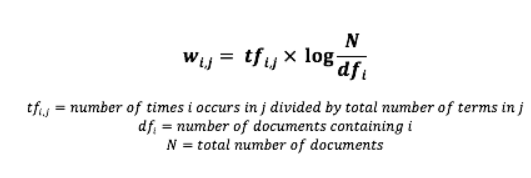

**Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.**

## TF-IDF Vectorizer

In [21]:
def clean(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean)
X_tfidf = tfidf_vect.fit_transform(data['BodyText'])
print(X_tfidf.shape)
# print(tfidf_vect.get_feature_names())

(5567, 8104)


## Vectorizer to sparse matrix

In [23]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

# 5- Feature Engineering - Feature Creation

## 5-1 Feature 1 : Text message Length

In [24]:
df['Body_Len'] = df['BodyText'].apply(lambda x: len(x) - x.count(" "))

In [25]:
df.head()

,Label,BodyText,Cleaned_Text,Body_Len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...,135


## 5-2 Feature 2: Punctutaion present (%)

In [26]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['Punct%'] = df['BodyText'].apply(lambda x: count_punct(x))

df.head()

,Label,BodyText,Cleaned_Text,Body_Len,Punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...,135,4.4


## 5-3 Plotting the graphs to for the features created: Data Visualization

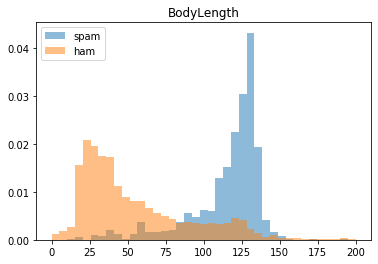

In [27]:
bins = np.linspace(0, 200, 40)

pyplot.hist(df[df['Label']=='spam']['Body_Len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(df[df['Label']=='ham']['Body_Len'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.title("BodyLength")
pyplot.show()

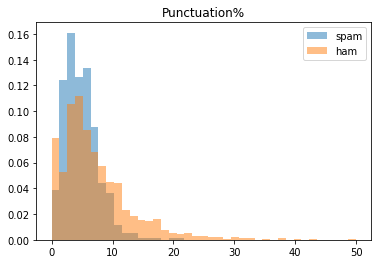

In [28]:
bins = np.linspace(0, 50, 40)

pyplot.hist(df[df['Label']=='spam']['Punct%'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(df[df['Label']=='ham']['Punct%'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.title("Punctuation%")
pyplot.show()

## Body Length and Punctuation % distribution

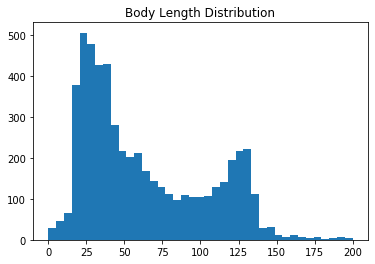

In [29]:
bins = np.linspace(0, 200, 40)

pyplot.hist(df['Body_Len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

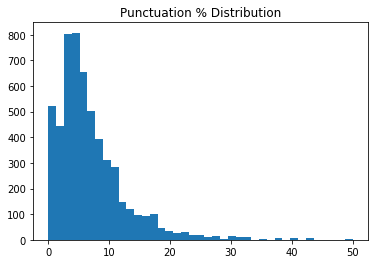

In [30]:
bins = np.linspace(0, 50, 40)

pyplot.hist(df['Punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

## 5-4 Now Concatenating the Features created with the TF-IDF converted data

In [31]:
X_features = pd.concat([df['Body_Len'], df['Punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,Body_Len,Punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

# 6 Model Building

## 6-1: Random Forest Classifier

In [32]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['Label'], test_size = 0.2)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf_classifier.fit(X_train, y_train)

In [36]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.06100595372004342, 'Body_Len'),
 (0.03739183659941173, 3134),
 (0.026789458608339783, 1803),
 (0.026230188043096004, 2031),
 (0.023993317634433874, 4796),
 (0.021582625409665365, 7350),
 (0.021246986133076337, 7027),
 (0.020006809363670684, 5724),
 (0.016174247338612877, 5988),
 (0.015691877227031917, 6285)]

In [37]:
y_pred = rf_classifier.predict(X_test)

In [38]:
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 0.589 / Accuracy: 0.946


## 6-1.0: Cross-Validation (K-Fold)

**Cross-validation:** Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration.

**KFold** divides all the samples in groups of samples, called folds of equal sizes. The prediction function is learned using folds, and the fold left out is used for test.

In [39]:
from sklearn.model_selection import KFold, cross_val_score

rf_classifier = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf_classifier, X_features, data['Label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.96947935, 0.97755835, 0.96765499, 0.95777179, 0.96765499])

### It is observed that the data has an average accuracy of 96% which shows that there is no bias in the data split which the model will train on. Which inturn avoids model overfitting.

## 6-1.1: Hyper Parameter tuning using Grid Search


**Grid-search:** Exhaustively search all parameter combinations in a given grid to determine the best model.

## Building Custom Grid search for better understanding

In [40]:
def train_RF(n_est, depth):
    rf_classifier = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf_classifier.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [41]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.281 / Accuracy: 0.906
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.63 / Accuracy: 0.952
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.747 / Accuracy: 0.967
Est: 10 / Depth: None ---- Precision: 0.992 / Recall: 0.801 / Accuracy: 0.973
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.212 / Accuracy: 0.897
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.568 / Accuracy: 0.943
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.774 / Accuracy: 0.97
Est: 50 / Depth: None ---- Precision: 0.992 / Recall: 0.829 / Accuracy: 0.977
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.233 / Accuracy: 0.899
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.527 / Accuracy: 0.938
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.76 / Accuracy: 0.969
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.829 / Accuracy: 0.978


## 6-1.2: Parameter tuning using Grid Search CV

Storing the parameter values for **cross validation** in a Dictonary

In [42]:
# For TF-IDF Vectorizer data

from sklearn.model_selection import GridSearchCV

param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf_classifier, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_features, data['Label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,46.024332,2.678269,1.815987,0.478403,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975785,0.977538,0.974843,0.969452,0.971249,0.973774,0.002980,1
10,26.174469,0.554581,1.578450,0.313655,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977578,0.976640,0.973944,0.968553,0.971249,0.973594,0.003352,2
11,45.487551,10.159698,1.155308,0.714470,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978475,0.976640,0.974843,0.968553,0.969452,0.973594,0.003930,2
4,19.072881,0.588103,1.520436,0.461621,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.979372,0.975741,0.972147,0.966757,0.970350,0.972876,0.004355,4
5,35.844632,3.456137,1.631415,0.568186,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.977578,0.973944,0.973944,0.967655,0.971249,0.972876,0.003296,4


### It is observed that RandomForestClassifier model works best with 'max_depth': 90, 'n_estimators': 300 after parameter tuning

In [43]:
rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 0.836 / Accuracy: 0.978


In [44]:
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=90, n_jobs=-1)
rf_model = rf_classifier.fit(X_train, y_train)

In [45]:
y_pred = rf_classifier.predict(X_test)

In [46]:
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 0.836 / Accuracy: 0.978


---

## 6-2: Gradient Boosting model

Gradient boosting is typically used with **decision trees** of a fixed size as base (models)learners. Furthermore, a decision tree is added sequentially with inputs as Independent variable and Learning Rate(alpha which ranges from 0-1) with Residuals.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

## Building Custom Grid search for better understanding

In [48]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [49]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.869
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.918 / Recall: 0.767 / Accuracy: 0.961
Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.838 / Recall: 0.781 / Accuracy: 0.952
Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.007 / Accuracy: 0.87
Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.885 / Recall: 0.842 / Accuracy: 0.965
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.863 / Recall: 0.822 / Accuracy: 0.96
Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.869
Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.891 / Recall: 0.836 / Accuracy: 0.965
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.879 / Recall: 0.849 / Accuracy: 0.965
Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.869
Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.88 / Recall: 0.856 / Accuracy: 0.966
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.891 / Recall: 0.842 / Accuracy: 0

## 6-2.0: Parameter tuning using Grid Search CV

In [50]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

gb_classifier = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = gb_classifier.fit(X_features, data['Label'])

### It is observed that GradientBoostingClassifier model works best with 'max_depth': 11 , 'n_estimators': 150 after parameter tuning

In [51]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

gb_model = gb.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Precision: 0.888 / Recall: 0.87 / Accuracy: 0.969


---

# 7 - Conclusion:

   - Data preparation involving removing punctuation, tokenizing, stop-words, stemming/lemmatization.
   - Furthermore,creating features for enhancing the model prediction.
   - Vectorising the data using both count vectorizer and TF-IDF vectorizer for understanding and selecting TF-IDF vectorized data for models.
   - On the cleaned data, models such as Random forest classifier and Gradient Boosting models are trained and tested.
   - Hyper Parameter tuning is performed using GridSearch to find the best values to input for the parameters inorder to enhance the models performance; model evaluation.
   - It is observed that the model performs better after Hyper parameter tuning is performed.



---